In [ ]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd  
import numpy as np
import pickle
#!pip install pickle5
import pickle5 as p
import nltk
import string
import matplotlib.pyplot as plt
import random
import csv
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import re
%matplotlib inline


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/zomato/new_reviews.csv", encoding='utf8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vocab_size = 50000
embedding_dim = 512
max_length = 1000
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset['reviews'], dataset['ratings'], test_size=0.1)

In [ ]:
tokenizer_path = "/content/drive/MyDrive/zomato/tokenizer_50000_512_1000_90_10.pickle"


with open(tokenizer_path, 'rb') as handle:
    tokenizer = p.load(handle)

tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:20])

{'<OOV>': 1,
 "'": 2,
 'x83': 3,
 'x82ã': 4,
 'x82': 5,
 'x83ã': 6,
 "'rated": 7,
 'n': 8,
 "0'": 9,
 "'place'": 10,
 "'good'": 11,
 "'food'": 12,
 "'4": 13,
 "'5": 14,
 "n'": 15,
 "'chicken'": 16,
 "'3": 17,
 "'service'": 18,
 "'ordered'": 19,
 "'great'": 20}

In [ ]:
train_sequences = tokenizer.texts_to_sequences(x_train)
print(train_sequences[10])

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

[2, 2, 2, 2, 7, 36, 9, 2, 2, 2, 7, 8, 3604, 928, 2, 2, 346, 1515, 2, 2, 2044, 19, 137, 2238, 2, 2, 223, 206, 2, 2, 1048, 657, 89, 1053, 152, 38, 2, 2, 131, 50, 59, 266, 6963, 3539, 2, 2, 3756, 539, 2, 2, 3072, 652, 106, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 36, 9, 2, 2, 2, 7, 8, 907, 45, 736, 5361, 2, 2, 95, 349, 439, 2, 2, 16477, 10714, 2, 2, 4783, 2, 2, 2, 2, 45, 7898, 907, 2807, 349, 2, 2, 222, 2, 2, 518, 144, 3001, 46448, 5361, 4273, 409, 1053, 1312, 56, 1234, 879, 2, 2, 2, 2113, 4356, 1601, 172, 430, 56, 1672, 7600, 9317, 1325, 1379, 137, 243, 7976, 2, 2, 382, 45, 820, 1140, 844, 10188, 2, 2, 196, 1093, 1466, 2, 2, 424, 2312, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 36, 9, 2, 2, 2, 2, 2, 7, 15, 18023, 2, 2, 256, 62, 31, 95, 1897, 2, 2, 29, 1676, 2346, 95, 31, 668, 2, 2, 364, 78, 828, 10, 31, 10353, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 17, 27, 2, 2, 2, 7, 8, 209, 4666, 13255, 20596, 3916, 2477, 96, 1047, 137, 2610, 2326, 42825, 1047, 2, 2, 198, 10187, 686, 1068, 2792, 137, 107, 11, 581, 2, 2, 131, 567, 1

In [ ]:
print(train_padded[10])

[    2     2     2     2     7    36     9     2     2     2     7     8
  3604   928     2     2   346  1515     2     2  2044    19   137  2238
     2     2   223   206     2     2  1048   657    89  1053   152    38
     2     2   131    50    59   266  6963  3539     2     2  3756   539
     2     2  3072   652   106     2     2     2     2     2     2     2
     2     2     7    36     9     2     2     2     7     8   907    45
   736  5361     2     2    95   349   439     2     2 16477 10714     2
     2  4783     2     2     2     2    45  7898   907  2807   349     2
     2   222     2     2   518   144  3001 46448  5361  4273   409  1053
  1312    56  1234   879     2     2     2  2113  4356  1601   172   430
    56  1672  7600  9317  1325  1379   137   243  7976     2     2   382
    45   820  1140   844 10188     2     2   196  1093  1466     2     2
   424  2312     2     2     2     2     2     2     2     2     2     7
    36     9     2     2     2     2     2     7   

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(x_test)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

4167
(4167, 1000)


In [ ]:
model = tf.keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim),
    layers.Bidirectional(layers.LSTM(embedding_dim, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(int(embedding_dim/2))),
    layers.Dense(int(embedding_dim/4), activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 256)         12800000  
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 512)        1050624   
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 6)                

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint('zomato_1.keras', save_best_only=True),
             keras.callbacks.EarlyStopping(patience=3)]

In [ ]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(validation_padded, y_test), callbacks=callbacks)

Epoch 1/10
1172/1172 [==============================] - 281s 235ms/step - loss: 0.5780 - accuracy: 0.7563 - val_loss: 0.4449 - val_accuracy: 0.8337
Epoch 2/10
1172/1172 [==============================] - 275s 235ms/step - loss: 0.3396 - accuracy: 0.8856 - val_loss: 0.2983 - val_accuracy: 0.8980
Epoch 3/10
1172/1172 [==============================] - 273s 233ms/step - loss: 0.1972 - accuracy: 0.9393 - val_loss: 0.2404 - val_accuracy: 0.9280
Epoch 4/10
1172/1172 [==============================] - 272s 232ms/step - loss: 0.1220 - accuracy: 0.9635 - val_loss: 0.2396 - val_accuracy: 0.9278
Epoch 5/10
1172/1172 [==============================] - 273s 233ms/step - loss: 0.0827 - accuracy: 0.9751 - val_loss: 0.2255 - val_accuracy: 0.9465
Epoch 6/10
1172/1172 [==============================] - 272s 232ms/step - loss: 0.0680 - accuracy: 0.9797 - val_loss: 0.1881 - val_accuracy: 0.9506
Epoch 7/10
1172/1172 [==============================] - 272s 232ms/step - loss: 0.0561 - accuracy: 0.9828 - val_

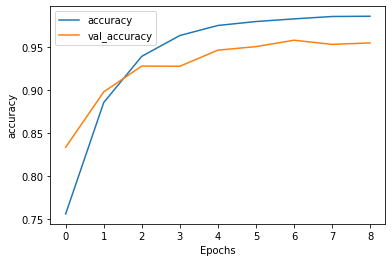

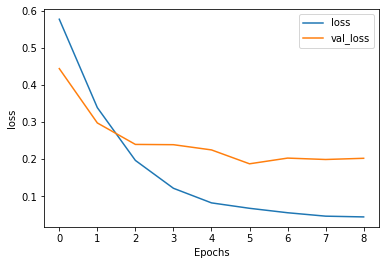

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")